In [1]:
import json
import os

# Define the path to the JSON file on McKenna's Mac desktop
file_path = '/Users/mckennamartin/Desktop/sample_data.json'

# Check if the file exists
if os.path.exists(file_path):
    try:
        # Open and read the JSON file
        with open(file_path, 'r') as file:
            data = json.load(file)

        # Print the data
        print(data)

    except json.JSONDecodeError:
        print(f"The file at {file_path} is not a valid JSON file.")
else:
    print(f"File not found at {file_path}")

[{'Recipient': 'B', 'Donor': ['A', 'AB']}, {'Recipient': 'A', 'Donor': ['B', 'AB']}, {'Recipient': 'B', 'Donor': ['AB']}, {'Recipient': 'A', 'Donor': ['AB']}, {'Recipient': 'A', 'Donor': ['B', 'AB']}, {'Recipient': 'B', 'Donor': ['A', 'AB']}, {'Recipient': 'B', 'Donor': ['A', 'AB']}, {'Recipient': 'O', 'Donor': ['A', 'B', 'AB']}, {'Recipient': 'O', 'Donor': ['A', 'B', 'AB']}, {'Recipient': 'A', 'Donor': ['B', 'AB']}, {'Recipient': 'B', 'Donor': ['AB']}, {'Recipient': 'O', 'Donor': ['B', 'AB']}, {'Recipient': 'B', 'Donor': ['A', 'AB']}, {'Recipient': 'A', 'Donor': ['B', 'AB']}, {'Recipient': 'B', 'Donor': ['AB']}, {'Recipient': 'A', 'Donor': ['B', 'AB']}, {'Recipient': 'B', 'Donor': ['A', 'AB']}, {'Recipient': 'O', 'Donor': ['A', 'B', 'AB']}, {'Recipient': 'O', 'Donor': ['A', 'AB']}, {'Recipient': 'A', 'Donor': ['B']}, {'Recipient': 'O', 'Donor': ['A', 'AB']}, {'Recipient': 'O', 'Donor': ['A', 'AB']}, {'Recipient': 'O', 'Donor': ['A', 'B']}, {'Recipient': 'B', 'Donor': ['A', 'AB']}, {'R

In [3]:
import networkx as nx


# Create a graph
G = nx.DiGraph()

# Create nodes
counter = 0
for element in data:
    #print(element)
    G.add_nodes_from([(counter, element)])
    counter += 1

#G.add_nodes_from(data)

#print(G.nodes)

donor_recipient_compatibility = {'O': ['O', 'A', 'B', 'AB'], 'A': ['A', 'AB'], 'B':['B', 'AB'], 'AB':['AB']}

# Create edges
for node in G.nodes:
    donors = G.nodes[node]['Donor']
    #print(donors)
    for donor in donors:
        for vertex in G.nodes:
            if node == vertex: continue
            recipient = G.nodes[vertex]['Recipient']
            if recipient not in donor_recipient_compatibility[donor]: continue
            G.add_edge(node, vertex)    
                
print('edges:', G.edges)    

edges: [(0, 1), (0, 3), (0, 4), (0, 9), (0, 13), (0, 15), (0, 19), (0, 25), (0, 26), (0, 27), (0, 42), (0, 44), (0, 47), (0, 50), (0, 51), (0, 53), (0, 54), (0, 60), (0, 65), (0, 67), (0, 71), (0, 72), (0, 73), (0, 75), (0, 80), (0, 82), (0, 84), (0, 85), (0, 88), (0, 94), (0, 96), (0, 97), (0, 102), (0, 103), (0, 110), (0, 111), (0, 112), (0, 113), (0, 114), (0, 119), (0, 120), (0, 122), (0, 125), (0, 128), (0, 132), (0, 133), (0, 138), (0, 139), (0, 142), (0, 144), (0, 148), (0, 149), (0, 154), (0, 162), (0, 163), (0, 164), (0, 165), (0, 168), (0, 171), (0, 172), (0, 173), (0, 181), (0, 184), (0, 186), (0, 187), (0, 189), (0, 193), (0, 195), (0, 200), (0, 202), (0, 209), (0, 213), (0, 216), (0, 222), (0, 223), (0, 227), (0, 228), (0, 230), (0, 232), (0, 235), (0, 241), (0, 243), (0, 246), (0, 247), (0, 249), (0, 255), (0, 256), (0, 257), (0, 261), (0, 262), (0, 263), (0, 272), (0, 277), (0, 278), (0, 280), (0, 282), (0, 287), (0, 297), (0, 302), (0, 306), (0, 311), (0, 315), (0, 316)

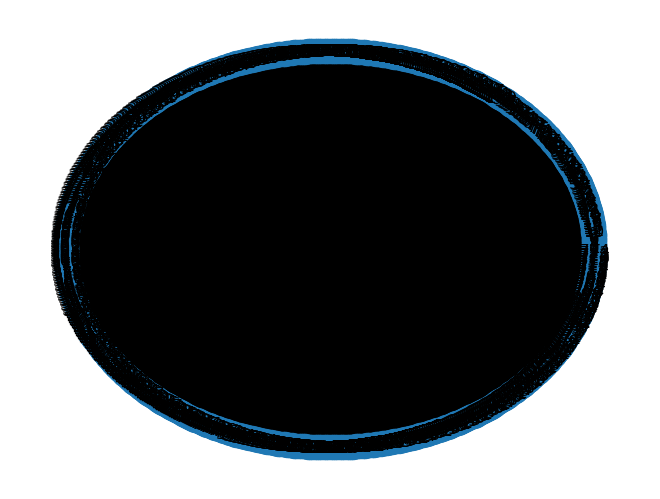

In [16]:
# Visualize the graph, for fun
import matplotlib.pyplot as plt
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels = True, connectionstyle="arc3,rad=0.1")

In [5]:
# Let's find a maximum matching
import gurobipy as gp
from gurobipy import GRB

# Create model object
m = gp.Model()

# Create variable for each edge
x = m.addVars(G.edges, vtype=GRB.BINARY)

# Objective function: maximize number of edges
m.setObjective(gp.quicksum(x[e] for e in G.edges), GRB.MAXIMIZE)

# The number of incomming arcs to each vertex is at most one
m.addConstrs(gp.quicksum(x[(u,v)] for u in G.neighbors(v) if (u,v) in G.edges) <= 1 for v in G.nodes)

# The number of incomming arcs should be equal to the number of outgoing arcs
m.addConstrs(gp.quicksum(x[(u,v)] for u in G.neighbors(v) if (u,v) in G.edges) == gp.quicksum(x[(v,u)] for u in G.neighbors(v) if (v,u) in G.edges) for v in G.nodes)

# Solve
m.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-13
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 23.4.0 23E214)

CPU model: Apple M3 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1450 rows, 186098 columns and 341498 nonzeros
Model fingerprint: 0x64183993
Variable types: 0 continuous, 186098 integer (186098 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 660 rows and 107608 columns
Presolve time: 0.17s
Presolved: 790 rows, 78490 columns, 156585 nonzeros
Variable types: 0 continuous, 78490 integer (78490 binary)

Root relaxation: objective 3.700000e+02, 3565 iterations, 0.27 seconds (1.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl

In [7]:
print("Objective:",m.objVal)

selected_edges = [e for e in G.edges if x[e].X > 0.5]

Objective: 370.0


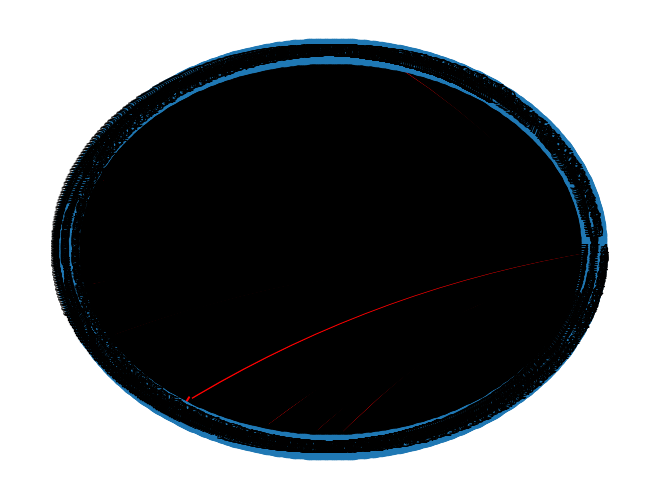

In [9]:
# Visualize the solution
edge_colors = [ "red" if e in selected_edges else "black" for e in G.edges ]

pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels = True, connectionstyle="arc3,rad=0.1", edge_color=edge_colors)


In [ ]:
# Visualize the graph, for fun
import matplotlib.pyplot as plt
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels = True, connectionstyle="arc3,rad=0.1")

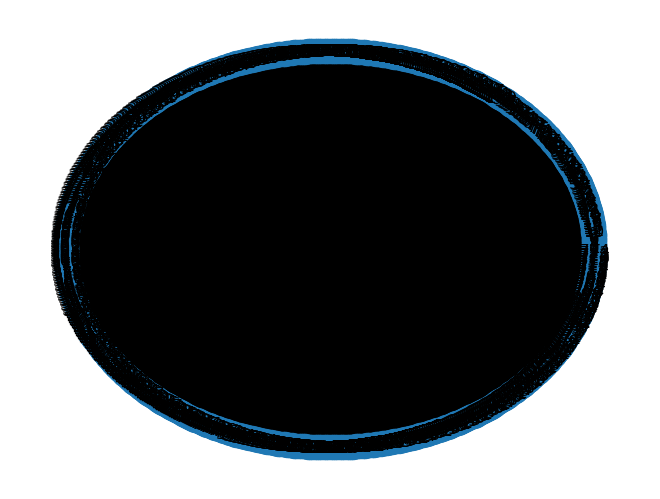

In [31]:
import networkx as nx
import random

if len(selected_edges) >= 370:
    sampled_edges = random.sample(selected_edges, 370)
else:
    sample_edges = selected_edges

sample = G.edge_subgraph(sampled_edges)

pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, connectionstyle="arc3,rad=0.1")

In [35]:
>>> import gurobipy as gp
>>> m = gp.Model()
>>> m.optimize()

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 23.4.0 23E214)

CPU model: Apple M3 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 0 rows, 0 columns and 0 nonzeros
Model fingerprint: 0xf9715da1
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  0.000000000e+00
